In [1]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import mip.utils as utils

## load in data

In [5]:
sample = 'HT206B1-H1'
fp = f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/{sample}/level_4/spatial_features.h5ad'

In [6]:
adata = sc.read_h5ad(fp)
adata

AnnData object with n_obs × n_vars = 221081 × 30
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3 intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min

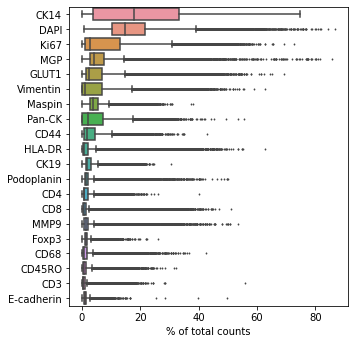

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [8]:
sc.pp.log1p(adata)

In [9]:
adata.var.index.to_list()

['DAPI',
 'CD31',
 'E-cadherin',
 'CD4',
 'CD20',
 'Ki67',
 'CD68',
 'Pan-CK',
 'CD8',
 'Histone H3 Pho',
 'CD163',
 'Podoplanin',
 'CD3',
 'CD36',
 'HIF1a',
 'GLUT1',
 'GATA3',
 'CD45RO',
 'CD45RA',
 'SMA',
 'CK19',
 'MGP',
 'Vimentin',
 'Maspin',
 'Foxp3',
 'MMP9',
 'HLA-DR',
 'CK14',
 'CD11c',
 'CD44']

In [10]:
adata.raw = adata

In [11]:
annotation_marker_map = {
    'Endothelial': ['CD31'],
    'Epithelial': ['E-cadherin', 'Pan-CK'],
    'B cell': ['CD20'],
    'Macrophage': ['CD68', 'CD163'],
    'DC': ['CD11c'],
    'T cell': ['CD3', 'CD4', 'CD8', 'CD45RO'],
    'Fibroblast/Myo': ['Podoplanin', 'SMA', 'Vimentin'],
}
annotation_markers = [v for k, vs in annotation_marker_map.items() for v in vs]

In [12]:
# I've found it helpful to limit to markers only used in annotation
# This helps keep the clusters cleaner
adata = adata[:, annotation_markers]
adata

View of AnnData object with n_obs × n_vars = 221081 × 14
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3 intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 inten

In [13]:
sc.pp.neighbors(adata, n_neighbors=15)

In [14]:
sc.tl.umap(adata)

In [15]:
sc.tl.leiden(adata, resolution=1.)

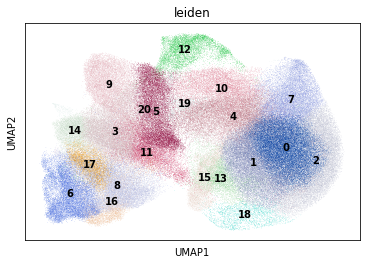

In [16]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data')

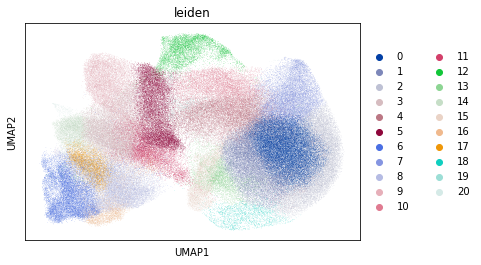

In [28]:
sc.pl.umap(adata, color=['leiden'])

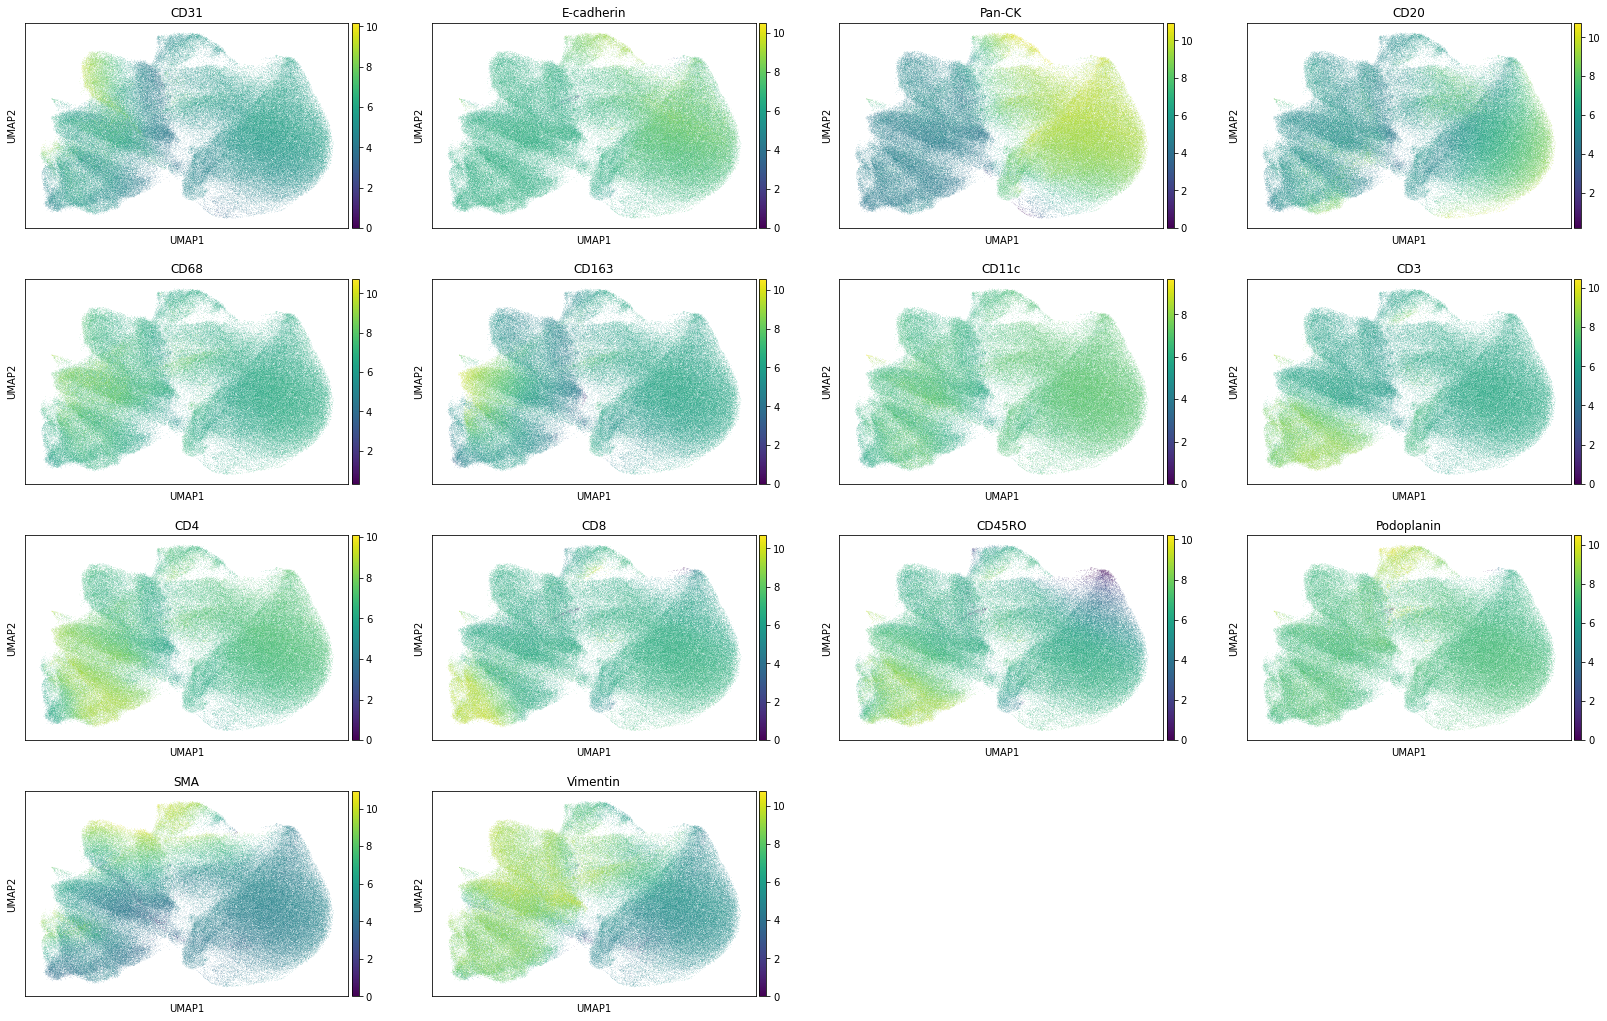

In [17]:
sc.pl.umap(adata, color=annotation_markers)

In [30]:
cluster_map = {
    'Endothelial': [9],
    'Fibroblast': [20, 5, 11],
    'Macrophage': [14, 3],
    'CD8_T_cell': [6],
    'CD4_T_cell': [17, 8],
    'B_cell': [16],
    'Epithelial': [12, 19, 10, 4, 7, 0, 2, 1, 13, 15, 18],
}

r = {str(v):k for k, vs in cluster_map.items() for v in vs}
adata.obs['cell_type'] = [r.get(l, l)
                          for l in adata.obs['leiden']]

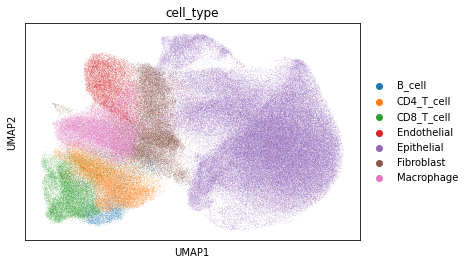

In [31]:
sc.pl.umap(adata, color='cell_type')

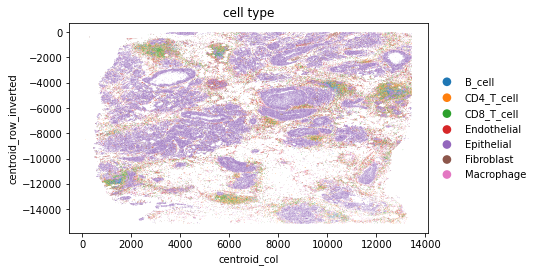

In [32]:
adata.obs['centroid_row_inverted'] = [-x for x in adata.obs['centroid_row']]
sc.pl.scatter(adata, x='centroid_col', y='centroid_row_inverted', color='cell_type')

In [33]:
adata.obs

area   perimeter  bbox_row_min  bbox_col_min  bbox_row_max  \
CellID                                                               
1        520  110.840620             0          3673            25   
2        409   98.704581             0          3711            26   
3        845  150.675144             0          3739            32   
4        241   70.870058             0          3873            12   
5        733  115.639610             0          3888            35   
...      ...         ...           ...           ...           ...   
221077   340   80.970563         15108         10235         15120   
221078   162   62.248737         15107          9158         15120   
221079    35   24.485281         15116          9213         15120   
221080   165   80.420310         15112          9224         15120   
221081    62   46.692388         15114          6872         15120   

        bbox_col_max  centroid_row  centroid_col  eccentricity  \
CellID                                                           
1               3709      8.378846   3693.750000      0.723583   
2               3740      8.728606   3722.951100      0.452175   
3               3776     13.584615   3755.928994      0.368285   
4               3902      4.082988   3886.991701      0.928244   
5               3921     16.049113   3906.064120      0.497079   
...              ...           ...           ...           ...   
221077         10268  15114.164706  10249.664706      0.935688   
221078          9182  15115.290123   9168.080247      0.861327   
221079          9224  15117.828571   9218.000000      0.938642   
221080          9262  15116.981818   9240.272727      0.985418   
221081          6894  15117.725806   6883.258065      0.977184   

        DAPI intensity max  ...  Maspin intensity min  Foxp3 intensity min  \
CellID                      ...                                              
1                  49006.0  ...                 454.0                205.0   
2                  44971.0  ...                  54.0                 15.0   
3                  49170.0  ...                  24.0                 19.0   
4                  49978.0  ...                 419.0                191.0   
5                  59773.0  ...                  24.0                 23.0   
...                    ...  ...                   ...                  ...   
221077             26368.0  ...                 590.0                108.0   
221078             44711.0  ...                1145.0               1103.0   
221079             33583.0  ...                5778.0               1359.0   
221080             31372.0  ...                1382.0               1042.0   
221081              8843.0  ...                 118.0                  6.0   

        MMP9 intensity min  HLA-DR intensity min  CK14 intensity min  \
CellID                                                                 
1                      0.0                   8.0              1547.0   
2                      0.0                   8.0              4518.0   
3                      0.0                   4.0              8671.0   
4                     47.0                   6.0             56332.0   
5                     13.0                   3.0              4903.0   
...                    ...                   ...                 ...   
221077                 0.0                 149.0              1728.0   
221078               449.0                 227.0             52670.0   
221079              1250.0                 499.0             13957.0   
221080               513.0                 586.0             54412.0   
221081               191.0                  12.0               132.0   

        CD11c intensity min  CD44 intensity min  leiden   cell_type  \
CellID                                                                
1                     404.0                38.0       0  Epithelial   
2                      61.0                29.0       2  Epithelial   
3 

In [34]:
adata.write_h5ad(f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/{sample}/level_4/cell_annotation_macro.h5ad')

#### gating

In [125]:
from collections import Counter
import tifffile
from sklearn.cluster import DBSCAN
from skimage.transform import resize
from skimage.measure import label
from skimage.color import label2rgb
from skimage.segmentation import find_boundaries
from sklearn.neighbors import NearestNeighbors

In [36]:
channel_to_img = utils.extract_ome_tiff(f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/{sample}/level_2/{sample}.ome.tiff')
channel_to_img.keys()

dict_keys(['DAPI', 'CD31', 'E-cadherin', 'CD4', 'CD20', 'Ki67', 'CD68', 'Pan-CK', 'CD8', 'Histone H3 Pho', 'CD163', 'Podoplanin', 'CD3', 'CD36', 'HIF1a', 'GLUT1', 'GATA3', 'CD45RO', 'CD45RA', 'SMA', 'CK19', 'MGP', 'Vimentin', 'Maspin', 'Foxp3', 'MMP9', 'HLA-DR', 'CK14', 'CD11c', 'CD44'])

In [123]:
seg = tifffile.imread(f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/{sample}/level_3/segmentation/cell_segmentation.tif')
bounds = find_boundaries(seg)
seg.shape

(15120, 13440)

###### cd8 t cells

In [114]:
filtered = adata[adata.obs['cell_type']=='CD4_T_cell']
X = filtered.obs[['centroid_row', 'centroid_col']]
nbrs = NearestNeighbors(algorithm='ball_tree').fit(X)

In [115]:
radius = 200

In [116]:
g = nbrs.radius_neighbors_graph(X, radius=radius).toarray()
center_idx = np.argsort(g.sum(axis=1))[-1]
r, c = filtered.obs.iloc[center_idx]['centroid_row'], filtered.obs.iloc[center_idx]['centroid_col']
r, c = int(r), int(c)
r1, r2 = max(0, r - radius), r + radius
c1, c2 = max(0, c - radius), c + radius

In [117]:
f = filtered[((filtered.obs['centroid_row']>r1)&(filtered.obs['centroid_row']<r2))]
f = f[((f.obs['centroid_col']>c1)&(f.obs['centroid_col']<c2))]

xs, ys = f.obs['centroid_col'].to_list(), f.obs['centroid_row'].to_list()

In [171]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Div, RangeSlider, Spinner, Slider, ColumnDataSource, CustomJS
from bokeh.layouts import column
output_notebook()

Loading BokehJS ...

In [177]:
df

centroid_row  centroid_col    marker color
CellID                                            
207160  13100.475113   6021.574661  9.218831  blue
207193  13105.540462   6137.794798  8.140127  blue
207205  13104.933824   6328.647059  8.920976  blue
207262  13108.383764   6101.778598  7.884565  blue
207263  13110.785965   6162.835088  8.780401  blue
...              ...           ...       ...   ...
210391  13478.753968   6030.888889  8.377621  blue
210422  13478.253623   6226.173913  8.551208  blue
210472  13492.516464   6163.289428  8.528592  blue
210489  13487.201005   6181.135678  8.431722  blue
210502  13488.482143   6143.089286  7.856684  blue

[229 rows x 4 columns]

In [193]:
channel = 'CD4'
df = f.obs[['centroid_row', 'centroid_col']]
df['marker'] = f[:, channel].X.toarray().flatten()

# df['color'] = ['gray' if x < thresh.value else 'blue'
#               for x in df['marker']]
df['color'] = 'blue'

source = ColumnDataSource(data=dict(
                        x=df['centroid_col'],
                        y=df['centroid_row'],
                        color=df["color"],
                        marker=df['marker']
))

plot = figure(width=400, height=400)

plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

plot.image(image=[~bounds[r1:r2, c1:c2]],
        x=c1, y=r1, dw=radius * 2, dh=radius * 2, level="image")

plot.image(image=[channel_to_img[channel][r1:r2, c1:c2]],
        x=c1, y=r1, dw=radius * 2, dh=radius * 2, palette="Greens256", level="image", alpha=.90)


plot.circle('x', 'y', source=source, size=5, color="color")

callback = CustomJS(args=dict(source=source), code="""
    const data = source.data;
    const f = cb_obj.value;
    const x = data['x'];
    const y = data['y'];
    const color = data['color'];
    const marker = data['marker'];
    for (let i = 0; i < x.length; i++) {
        if (marker[i] < f) {
            color[i] = 'gray';
        } else {
            color[i] = 'blue';
        }
    }
    source.change.emit();
""")

slider = Slider(start=0, end=max(df['marker']), value=0, step=.1, title="marker threshold")
slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
# qitissue cluster file

In [27]:
df = adata.obs[['cell_type']]
df.index.name = 'CellID'
df.columns = ['Cluster']

m = {
    'Epithelial': '1',
    'Endothelial': '2',
    'Immune': '3'
}

df['label'] = df['Cluster'].to_list()
df['Cluster'] = [m[x] for x in df['Cluster']]

df.to_csv(f'/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/{sample}/level_4/cell_annotation_macro.csv')

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
